## 비트코인 가격 예측 : ARIMA

- **ARIMA 모델 활용 비트코인 시세 예측**


#### ARIMA : Autoregressive integrated moving average
- 자동회귀누적이동평균 모델

**자동회귀이동평균(ARMA : Autoregressive moving average) 모델의 일반화**

- ARIMA기법은 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함 
(1) AR(Autoregression) 모델로 자기 자신의 과거를 정보로 사용하는 개념 
- 진화하는 관심 변수가 시차(즉, 이전) 값으로 회귀됨
(2) MA(Moving Average) 모델
- 회귀 오류가 실제로 과거 여러 시간에 동시에 발생한 오류 항의 선형 조합 

이 둘을 합친것을 ARMA 모델이라고 하며, 
- ARIMA(Autoregressice Integrated Moving Average) 모델은   
- ARMA 모델에 추세 변동의 경향성 까지 반영한 방법


- 파이썬에서는 statsmodels 모듈로 ARIMA 분석 수행 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 사용 데이터
# https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = './market-price_3y.csv'
bitcoin_df = pd.read_csv(file_path, names =['day', 'price'], header=0)
bitcoin_df

day     price
0     2018-09-13 00:00:00   6326.04
1     2018-09-14 00:00:00   6479.60
2     2018-09-15 00:00:00   6487.12
3     2018-09-16 00:00:00   6522.39
4     2018-09-17 00:00:00   6497.37
...                   ...       ...
1091  2021-09-08 00:00:00  46809.17
1092  2021-09-09 00:00:00  46078.38
1093  2021-09-10 00:00:00  46368.69
1094  2021-09-11 00:00:00  44847.48
1095  2021-09-12 00:00:00  45144.79

[1096 rows x 2 columns]

In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1096 non-null   object 
 1   price   1096 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [4]:
# 문자열 day를 날짜형으로 형변환 : to_datetime()
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'] )
bitcoin_df

day     price
0    2018-09-13   6326.04
1    2018-09-14   6479.60
2    2018-09-15   6487.12
3    2018-09-16   6522.39
4    2018-09-17   6497.37
...         ...       ...
1091 2021-09-08  46809.17
1092 2021-09-09  46078.38
1093 2021-09-10  46368.69
1094 2021-09-11  44847.48
1095 2021-09-12  45144.79

[1096 rows x 2 columns]

In [5]:
# day로 인덱스 설정
bitcoin_df.set_index('day', inplace=True)
bitcoin_df.head()

price
day                
2018-09-13  6326.04
2018-09-14  6479.60
2018-09-15  6487.12
2018-09-16  6522.39
2018-09-17  6497.37

In [6]:
# 학습/예측에 사용할 데이터
train_df = bitcoin_df.loc['2020-04-19':'2021-04-14']
train_df

price
day                 
2020-04-19   7259.36
2020-04-20   7130.04
2020-04-21   6840.24
2020-04-22   6852.52
2020-04-23   7130.99
...              ...
2021-04-10  58102.58
2021-04-11  59774.00
2021-04-12  59964.87
2021-04-13  59834.74
2021-04-14  63554.44

[361 rows x 1 columns]

In [7]:
# 실제값 데이터로 사용
test_df = bitcoin_df.loc['2021-04-15':'2021-04-19']
test_df

price
day                 
2021-04-15  62969.12
2021-04-16  63252.63
2021-04-17  61455.98
2021-04-18  60087.09
2021-04-19  56251.48

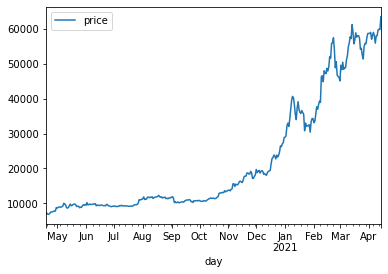

In [8]:
# 일자별 비트코인 시세 시각화
train_df.plot()
plt.show()

### ARIMA의 모수
- 3가지의 모수
- AR모형의 Lag(시차)을 의미하는 p, MA모형의 Lag(시차)을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d  
- 보통은 p, d, q의 순서로 씀
- 통상적으로 p + q < 2 값들이나  혹은 p와 q의 곱이 0을 포함한 짝수인 경우가 좋은 파라미터의 조합으로 알려져 있음

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [12]:
# train_df.price.values #array 형태

In [21]:
model = ARIMA(train_df.price.values, order=(2,1,2))
model_fit =  model.fit(trend='c', full_output=True, disp=True)

C:\Users\mkm05\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [22]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3039.309
Method:                       css-mle   S.D. of innovations           1115.166
Date:                Mon, 18 Oct 2021   AIC                           6090.619
Time:                        15:29:21   BIC                           6113.935
Sample:                             1   HQIC                          6099.890
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.0394     58.474      2.669      0.008      41.433     270.645
ar.L1.D.y     -0.5842      0.016    -36.012      0.000      -0.616      -0.552
ar.L2.D.y     -0.9732      0.015    -64.409      0.0

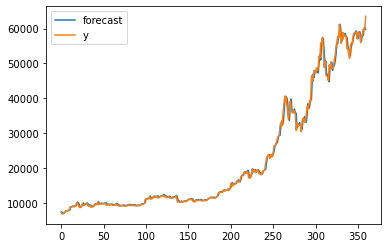

In [23]:
# 예측 시각화
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 (첫 번째 그래프)

<AxesSubplot:>

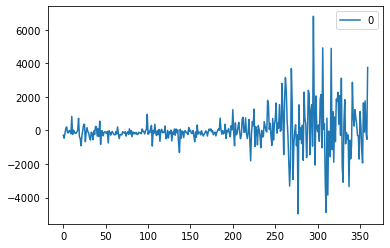

In [24]:
residuals = pd.DataFrame(model_fit.resid) # 잔차 변동 시각화 (두 번째 그래프)
residuals.plot()

### 실제 데이터와 비교

- 학습 데이터 이후 1일 시세를 예측
- ARIMA model의 forecast() 함수 사용


In [25]:
forecast_data = model_fit.forecast(steps=1) # 학습데이터 이후 1일 뒤 예측

In [26]:
forecast_data
# 예측값, stderr, [lower bound, upper bound]

(array([63421.07620225]),
 array([1115.16552556]),
 array([[61235.39193536, 65606.76046914]]))

In [27]:
forecast_data = model_fit.forecast(steps=5)

In [28]:
pred_y = forecast_data[0].tolist() # 5일 예측값
test_y = test_df.price.values # 5 일 실제값

In [29]:
pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

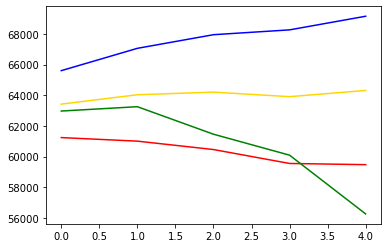

In [30]:
plt.plot(pred_y, color='gold') # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color='red') # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color='blue') # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color='green') # 실제 가격 그래프